f(0.112) = 1.2942
f(0.104) = 1.2705
f(0.107) = 1.2794
f(0.145) = 1.3962
f(0.133) = 1.3582
f(0.137) = 1.3709


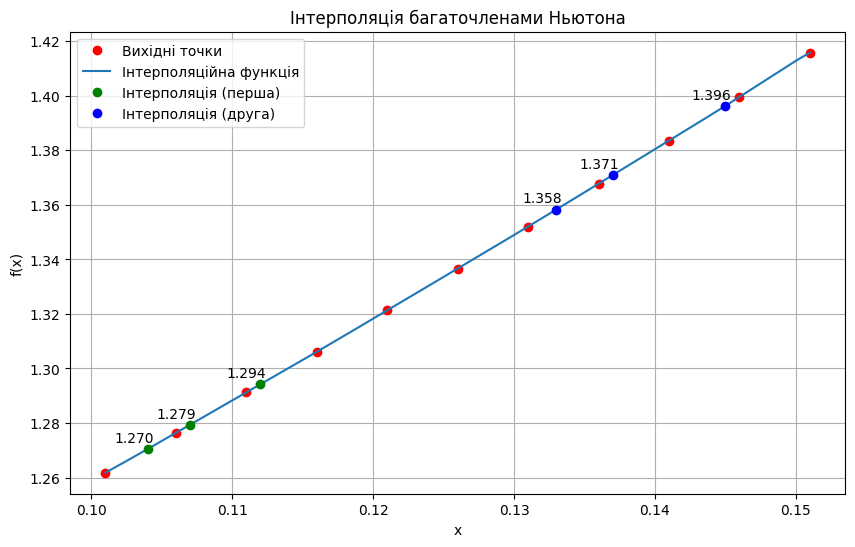

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані
xi = np.array([0.101, 0.106, 0.111, 0.116, 0.121, 0.126, 0.131, 0.136, 0.141, 0.146, 0.151])
yi = np.array([1.2618, 1.2764, 1.2912, 1.3061, 1.3213, 1.3366, 1.3520, 1.3677, 1.3835, 1.3995, 1.4157])

# Функція для обчислення інтерполяційних коефіцієнтів
def compute_newton_coefficients(xi, yi):
    n = len(xi)
    coefficients = yi.copy()

    for j in range(1, n):
        coefficients[j:] = (coefficients[j:] - coefficients[j - 1]) / (xi[j:] - xi[j - 1])

    return coefficients

# Функція для обчислення значень інтерполяційного багаточлена Ньютона
def interpolate_newton(x, xi, coefficients):
    n = len(xi)
    result = coefficients[-1]

    for i in range(n - 2, -1, -1):
        result = result * (x - xi[i]) + coefficients[i]

    return result

# Обчислюємо інтерполяційні коефіцієнти
coefficients = compute_newton_coefficients(xi, yi)

# Знаходимо значення у вказаних точках за обома інтерполяціями
x_values_first_interpolation = np.array([0.112, 0.104, 0.107])
y_values_first_interpolation = interpolate_newton(x_values_first_interpolation, xi, coefficients)

x_values_second_interpolation = np.array([0.145, 0.133, 0.137])
y_values_second_interpolation = interpolate_newton(x_values_second_interpolation, xi, coefficients)

# Виводимо значення у вказаних точках
for i in range(len(x_values_first_interpolation)):
    print(f'f({x_values_first_interpolation[i]:.3f}) = {y_values_first_interpolation[i]:.4f}')

for i in range(len(x_values_second_interpolation)):
    print(f'f({x_values_second_interpolation[i]:.3f}) = {y_values_second_interpolation[i]:.4f}')

# Побудова графіку інтерполяційної функції
x_values = np.linspace(min(xi), max(xi), 1000)
y_values = interpolate_newton(x_values, xi, coefficients)

plt.figure(figsize=(10, 6))
plt.plot(xi, yi, 'ro', label='Вихідні точки')
plt.plot(x_values, y_values, label='Інтерполяційна функція')
plt.plot(x_values_first_interpolation, y_values_first_interpolation, 'go', label='Інтерполяція (перша)')
plt.plot(x_values_second_interpolation, y_values_second_interpolation, 'bo', label='Інтерполяція (друга)')

# Позначення точок на графіку
for i, txt in enumerate(y_values_first_interpolation):
    plt.annotate(f'{y_values_first_interpolation[i]:.3f}', (x_values_first_interpolation[i], y_values_first_interpolation[i]), textcoords="offset points", xytext=(-10, 5), ha='center')

for i, txt in enumerate(y_values_second_interpolation):
    plt.annotate(f'{y_values_second_interpolation[i]:.3f}', (x_values_second_interpolation[i], y_values_second_interpolation[i]), textcoords="offset points", xytext=(-10, 5), ha='center')

plt.title('Інтерполяція багаточленами Ньютона')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
